## Exploratory Data Analysis

In this notebook, the Fashionpedia dataset is analyzed exhaustively. Note that the analysis is performed locally and not in Google Colab.

In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Fashionpedia dictionary
fashionpedia_dic = {
      0:'Background', 1:'shirt, blouse', 2:'top, t-shirt, sweatshirt', 3:'sweater', 4:'cardigan', 5:'jacket',
      6:'vest', 7:'pants', 8:'shorts', 9:'skirt', 10: 'coat', 11: 'dress', 12: 'jumpsuit', 13: 'cape',
      14: 'glasses', 15: 'hat', 16: 'headband, hair accessory', 17: 'tie', 18: 'glove', 19: 'watch', 20: 'belt',
      21: 'leg warmer',22: 'tights, stockings',23: 'sock',24:'shoe',25:'bag, wallet',26:'scarf',27:'umbrella',
      28: 'hood', 29:'collar', 30:'lapel', 31: 'epaulette',32:'sleeve',33:'pocket',34:'neckline',35:'buckle',
      36: 'zipper', 37: 'applique', 38: 'bead', 39:'bow', 40:'flower', 41: 'fringe', 42:'ribbon', 43:'rivet',
      44: 'ruffle', 45:'sequin', 46:'tassel'}

# Color map for all the clothing items
cmap = ['#050505', '#ba1414', '#59e346', '#3096c2', '#be29cc', '#ed9b4e', '#faed61', '#184cc7', '#1c5b75',
        '#289e4d', '#164d41', '#f04943', '#c24640', '#6cb5d4', '#e9eef0', '#01063d', '#bf02a6', '#02bf3b',
        '#ffb938', '#b5b2ac', '#ad7102', '#ffffff', '#e0e0e0', '#e9f7f4', '#474241', '#db998a', '#8d8adb',
        '#ce8adb', '#3096c2', '#ffd700', '#f2e0ac', '#ffc014', '#f7f2e4', '#4eba64', '#b1fac0', '#fbff1f',
        '#cfcfcf', '#e334b7', '#ff8b47', '#fc311e', '#f768eb', '#7cfcf4', '#eb4542', '#f9ff42', '#f55663',
        '#d9d9d4', '#d2d498']

Firslty, we created a function to generate dataframes with information about the images preseent, the labels they present, the relative area of the elements present, the amouunt of pixels and the height and width of the images. 

In [2]:
def generate_df(path):
    all_labels = []
    all_pixels = []
    all_counts = []
    all_h = []
    all_w = []
    
    ims = os.listdir(path)

    for i in ims:
        img = np.array(Image.open(path + i))
        vals = np.unique(img).tolist()
        pixels = img.shape[0]*img.shape[0]
        dic = {n:[] for n in vals}
        for val in vals:
            dic[val].append(np.count_nonzero(img==val)/pixels)
        all_labels.append(vals)
        all_pixels.append(pixels)
        all_counts.append(dic)
        all_h.append(img.shape[0])
        all_w.append(img.shape[1])
    return pd.DataFrame({'Image': ims, 'Labels': all_labels,'Relative ratio': all_counts,'Size': all_pixels, 'Height': all_h, 'Width': all_w})

In [3]:
# We apply the function and generate the dataframes
val_df = generate_df('seg_val/')
val_df.to_pickle("Validation_df.pkl")

train_df = generate_df('seg_train/')
train_df.to_pickle("Train_df.pkl")

In [2]:
# We read the dataframes
train_df = pd.read_pickle("Train_df.pkl")
val_df = pd.read_pickle("Validation_df.pkl")

## Object count:

We created a fucntion to calculate and plot the occurences of each label.

In [3]:
def object_count(df, title):
    labels = list(df['Labels'].explode())
    labels = [i for i in labels if i!=0]

    # plot the data distribution
    fig = plt.figure(figsize = (9,6))
    ax = fig.add_axes([0,0,1,1])
    labs = list(fashionpedia_dic.values())[1:]
    counts = np.array([labels.count(val) for val in range(1,47)]) / len(df['Image']) * 100
    ax.bar(labs,counts,color = cmap[1:], edgecolor='black')
    plt.xticks([i for i in range(46)], labs, rotation='vertical')
    plt.ylabel("Distribution of objects (%)")
    plt.title(title, fontsize = 18)
    plt.show()

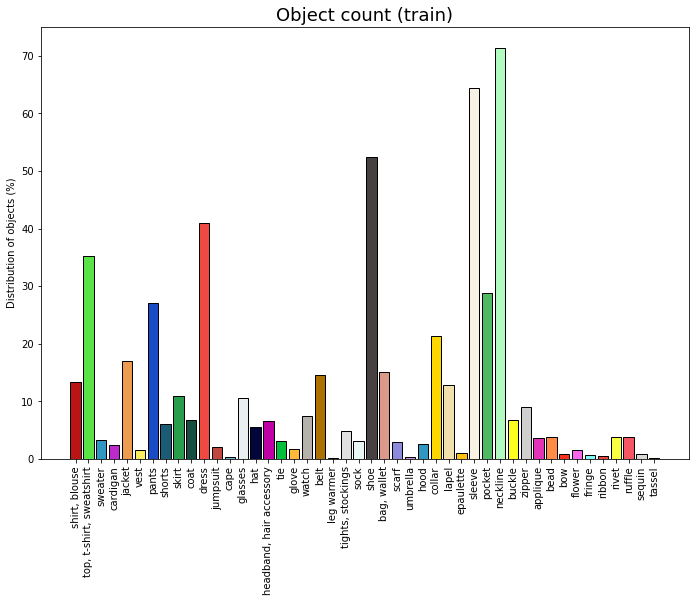

In [4]:
object_count(train_df, 'Object count (train)')

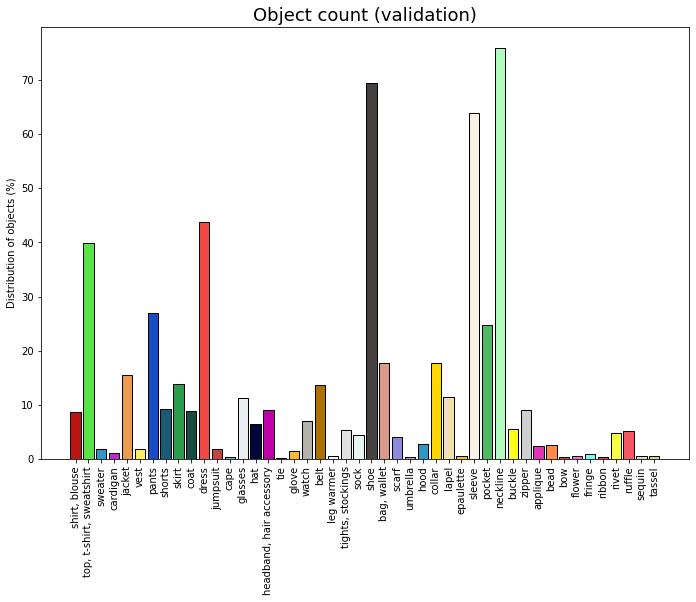

In [5]:
object_count(val_df, 'Object count (validation)')

## Area ratio:

We created a fucntion to find the presence ratio of each label and another one to plot them with the mean and standard deviations.

In [6]:
def presence_ratios(df):
    def_ratios = {key:[] for key in fashionpedia_dic}

    for dic in df['Relative ratio']:
        for key in dic:
            def_ratios[key].append(dic[key][0])
    means = [np.mean(def_ratios[key])*100 for key in fashionpedia_dic]
    stds = [np.std(def_ratios[key])*100 for key in fashionpedia_dic]

    for key in fashionpedia_dic:
        print(f"{fashionpedia_dic[key]} --> {round(means[key], 2)} ± {round(stds[key], 2)} %")
        
def presence_ratio_plots(df):
    def_ratios = {key:[] for key in fashionpedia_dic}

    for dic in df['Relative ratio']:
        for key in dic:
            def_ratios[key].append(dic[key][0])
    means = [np.mean(def_ratios[key])*100 for key in fashionpedia_dic]
    stds = [np.std(def_ratios[key])*100 for key in fashionpedia_dic]

    fig = plt.figure(figsize = (9,6))
    ax = fig.add_axes([0,0,1,1])
    labs = list(fashionpedia_dic.values())
    ax.bar(labs,means,color = cmap, edgecolor='black')
    ax.errorbar(labs,means,stds, fmt='o', color='Black', elinewidth=2,errorevery=1, alpha=0.8, ms=4, capsize = 4)
    plt.xticks([i for i in range(47)], labs, rotation='vertical')
    plt.ylabel("Area ratio (%)")
    plt.ylim([0,100])
    plt.title("Area ratio", fontsize = 18)
    plt.show()    
    
    fig = plt.figure(figsize = (9,6))
    ax = fig.add_axes([0,0,1,1])
    labs = list(fashionpedia_dic.values())[1:]
    ax.bar(labs,means[1:],color = cmap[1:], edgecolor='black')
    ax.errorbar(labs,means[1:],stds[1:], fmt='o', color='Black', elinewidth=2,errorevery=1, alpha=0.8, ms=4, capsize = 4)
    plt.xticks([i for i in range(46)], labs, rotation='vertical')
    plt.ylabel("Area ratio (%)")
    plt.ylim([0,30])
    plt.title("Area ratio (Zoomed)", fontsize = 18)
    plt.show()

In [7]:
presence_ratios(train_df)

Background --> 62.98 ± 27.62 %
shirt, blouse --> 5.47 ± 8.5 %
top, t-shirt, sweatshirt --> 7.24 ± 10.45 %
sweater --> 12.8 ± 12.33 %
cardigan --> 8.52 ± 10.66 %
jacket --> 5.97 ± 6.85 %
vest --> 4.77 ± 7.46 %
pants --> 5.09 ± 4.26 %
shorts --> 4.19 ± 9.24 %
skirt --> 6.37 ± 7.64 %
coat --> 8.08 ± 7.07 %
dress --> 10.21 ± 7.25 %
jumpsuit --> 8.42 ± 5.72 %
cape --> 10.86 ± 9.81 %
glasses --> 0.24 ± 0.24 %
hat --> 1.06 ± 1.08 %
headband, hair accessory --> 0.49 ± 1.83 %
tie --> 0.4 ± 0.59 %
glove --> 0.77 ± 0.76 %
watch --> 0.09 ± 0.1 %
belt --> 0.46 ± 0.64 %
leg warmer --> 1.16 ± 0.91 %
tights, stockings --> 2.24 ± 1.62 %
sock --> 0.31 ± 0.59 %
shoe --> 0.59 ± 0.63 %
bag, wallet --> 1.44 ± 1.91 %
scarf --> 2.8 ± 4.17 %
umbrella --> 7.15 ± 7.59 %
hood --> 1.57 ± 1.71 %
collar --> 0.45 ± 0.74 %
lapel --> 1.38 ± 1.66 %
epaulette --> 0.13 ± 0.29 %
sleeve --> 3.23 ± 3.5 %
pocket --> 0.68 ± 1.35 %
neckline --> 0.21 ± 0.47 %
buckle --> 0.06 ± 0.1 %
zipper --> 0.21 ± 0.33 %
applique --> 1.15 ± 2

In [8]:
presence_ratios(val_df)

Background --> 71.2 ± 32.52 %
shirt, blouse --> 2.96 ± 3.74 %
top, t-shirt, sweatshirt --> 3.19 ± 3.52 %
sweater --> 4.95 ± 6.49 %
cardigan --> 3.21 ± 1.8 %
jacket --> 3.57 ± 3.4 %
vest --> 3.29 ± 1.94 %
pants --> 4.34 ± 2.37 %
shorts --> 2.07 ± 1.67 %
skirt --> 4.43 ± 3.36 %
coat --> 5.58 ± 3.66 %
dress --> 7.55 ± 4.28 %
jumpsuit --> 6.85 ± 3.73 %
cape --> 6.89 ± 2.68 %
glasses --> 0.24 ± 0.22 %
hat --> 1.16 ± 1.87 %
headband, hair accessory --> 0.49 ± 1.66 %
tie --> 0.15 ± 0.02 %
glove --> 0.59 ± 0.4 %
watch --> 0.09 ± 0.14 %
belt --> 0.41 ± 0.44 %
leg warmer --> 2.66 ± 1.38 %
tights, stockings --> 2.1 ± 1.14 %
sock --> 0.25 ± 0.3 %
shoe --> 0.55 ± 0.55 %
bag, wallet --> 1.45 ± 1.67 %
scarf --> 2.25 ± 2.3 %
umbrella --> 8.62 ± 7.46 %
hood --> 0.65 ± 0.57 %
collar --> 0.23 ± 0.29 %
lapel --> 0.97 ± 0.95 %
epaulette --> 0.08 ± 0.05 %
sleeve --> 1.95 ± 1.96 %
pocket --> 0.34 ± 0.47 %
neckline --> 0.1 ± 0.14 %
buckle --> 0.05 ± 0.08 %
zipper --> 0.16 ± 0.21 %
applique --> 0.72 ± 0.93 %
b

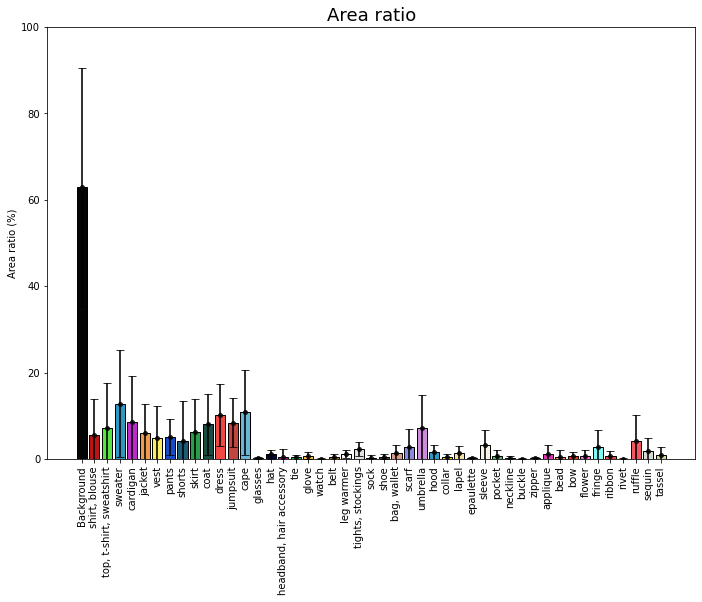

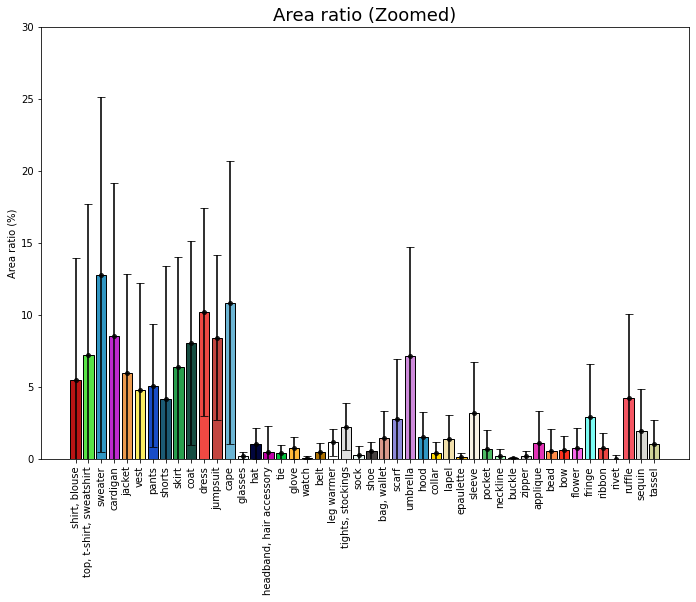

In [9]:
presence_ratio_plots(train_df)

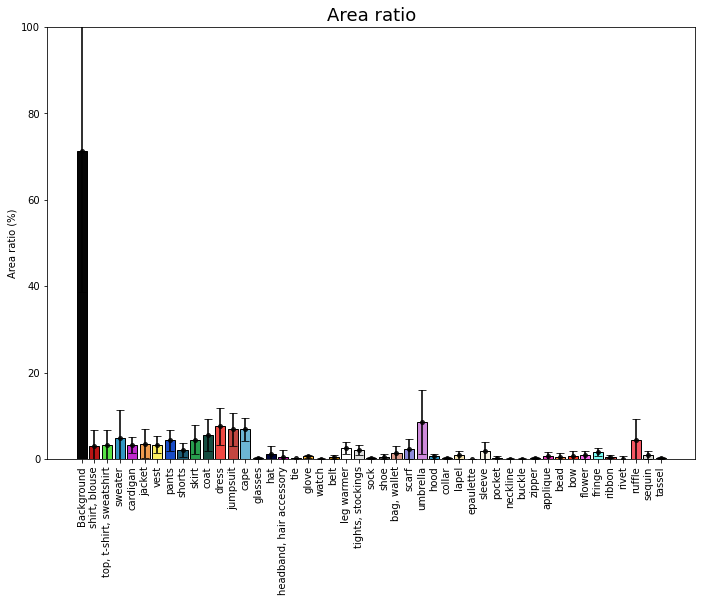

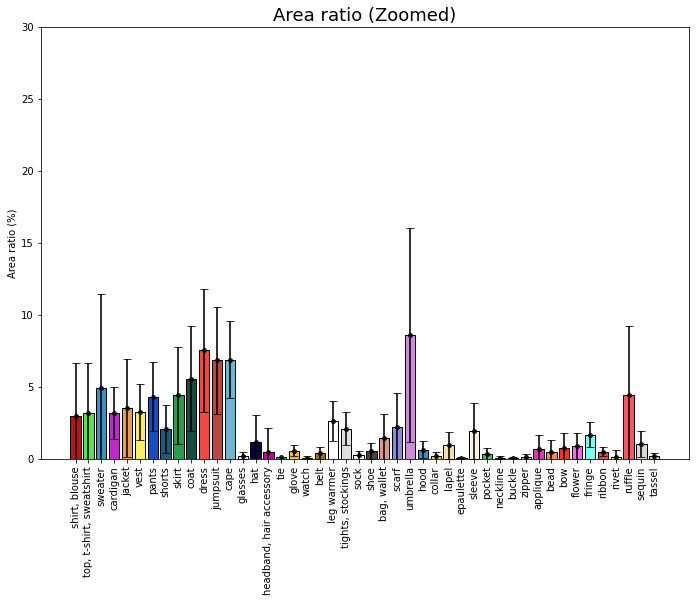

In [10]:
presence_ratio_plots(val_df)

## Shape:

We created a function to print the mean shape of the images in the dataset.

In [11]:
def print_mean_shape(df):  
    print(f"({round(np.mean(df['Height']),2)} ± {round(np.std(df['Height']),2)},{round(np.mean(df['Width']),2)}± {round(np.std(df['Width']),2)})")


In [12]:
print_mean_shape(train_df)

(986.51 ± 106.46,755.25± 146.88)


In [13]:
print_mean_shape(val_df)

(962.38 ± 131.81,750.74± 147.82)


## Number of occurences:

We implemented a occurrences counter which returned the amount of times each label appeared in the dataset.

In [14]:
def count_occurences(df):
    labels = list(df['Labels'].explode())
    counts = {val:labels.count(val) for val in range(0,47)}
    counts_sort = sorted(counts.items(), key=lambda x:x[1], reverse=True)

    for key in [key[0] for key in counts_sort]:
        print(f"{fashionpedia_dic[key]} --> {counts[key]} / {len(df)}")

In [15]:
count_occurences(train_df)

Background --> 45623 / 45623
neckline --> 32590 / 45623
sleeve --> 29397 / 45623
shoe --> 23954 / 45623
dress --> 18664 / 45623
top, t-shirt, sweatshirt --> 16102 / 45623
pocket --> 13124 / 45623
pants --> 12346 / 45623
collar --> 9786 / 45623
jacket --> 7741 / 45623
bag, wallet --> 6906 / 45623
belt --> 6639 / 45623
shirt, blouse --> 6084 / 45623
lapel --> 5884 / 45623
skirt --> 5029 / 45623
glasses --> 4847 / 45623
zipper --> 4118 / 45623
watch --> 3373 / 45623
buckle --> 3099 / 45623
coat --> 3084 / 45623
headband, hair accessory --> 2984 / 45623
shorts --> 2745 / 45623
hat --> 2514 / 45623
tights, stockings --> 2202 / 45623
rivet --> 1760 / 45623
bead --> 1729 / 45623
ruffle --> 1722 / 45623
applique --> 1682 / 45623
sweater --> 1480 / 45623
tie --> 1455 / 45623
sock --> 1438 / 45623
scarf --> 1362 / 45623
hood --> 1216 / 45623
cardigan --> 1101 / 45623
jumpsuit --> 922 / 45623
glove --> 757 / 45623
vest --> 717 / 45623
flower --> 709 / 45623
epaulette --> 497 / 45623
bow --> 387 /

In [16]:
count_occurences(val_df)

Background --> 1158 / 1158
neckline --> 880 / 1158
shoe --> 804 / 1158
sleeve --> 741 / 1158
dress --> 506 / 1158
top, t-shirt, sweatshirt --> 463 / 1158
pants --> 313 / 1158
pocket --> 287 / 1158
collar --> 206 / 1158
bag, wallet --> 205 / 1158
jacket --> 179 / 1158
skirt --> 161 / 1158
belt --> 158 / 1158
lapel --> 132 / 1158
glasses --> 130 / 1158
shorts --> 106 / 1158
headband, hair accessory --> 105 / 1158
zipper --> 105 / 1158
coat --> 103 / 1158
shirt, blouse --> 101 / 1158
watch --> 82 / 1158
hat --> 74 / 1158
buckle --> 64 / 1158
tights, stockings --> 62 / 1158
ruffle --> 59 / 1158
rivet --> 55 / 1158
sock --> 51 / 1158
scarf --> 48 / 1158
hood --> 32 / 1158
bead --> 31 / 1158
applique --> 28 / 1158
sweater --> 21 / 1158
vest --> 21 / 1158
jumpsuit --> 21 / 1158
glove --> 18 / 1158
cardigan --> 12 / 1158
fringe --> 11 / 1158
leg warmer --> 7 / 1158
epaulette --> 7 / 1158
sequin --> 7 / 1158
tassel --> 7 / 1158
flower --> 6 / 1158
cape --> 5 / 1158
umbrella --> 5 / 1158
bow -->

## Example of segmentation masks

Finally, we showed several examples of ground truth segmentation masks were categories with different area ratios can be captured.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.patches as mpatches
from PIL import Image


def calc_cmap(labels):
    color_list = ['#050505', '#ba1414', '#59e346', '#3096c2', '#be29cc', '#ed9b4e', '#faed61', '#184cc7', '#1c5b75',
        '#289e4d', '#164d41', '#f04943', '#c24640', '#6cb5d4', '#e9eef0', '#01063d', '#bf02a6', '#02bf3b',
        '#ffb938', '#b5b2ac', '#ad7102', '#ffffff', '#e0e0e0', '#e9f7f4', '#474241', '#db998a', '#8d8adb',
        '#ce8adb', '#3096c2', '#ffd700', '#f2e0ac', '#ffc014', '#f7f2e4', '#4eba64', '#b1fac0', '#fbff1f',
        '#cfcfcf', '#e334b7', '#ff8b47', '#fc311e', '#f768eb', '#7cfcf4', '#eb4542', '#f9ff42', '#f55663',
        '#d9d9d4', '#d2d498']
    max_class = np.max(np.unique(labels))
    return color_list[:max_class+1]

def plot_segmentation(image):

    fashionpedia_dic = {
        0:'Background', 1:'shirt, blouse', 2:'top, t-shirt, sweatshirt', 3:'sweater', 4:'cardigan', 5:'jacket',
        6:'vest', 7:'pants', 8:'shorts', 9:'skirt', 10: 'coat', 11: 'dress', 12: 'jumpsuit', 13: 'cape',
        14: 'glasses', 15: 'hat', 16: 'headband, hair accessory', 17: 'tie', 18: 'glove', 19: 'watch', 20: 'belt',
        21: 'leg warmer',22: 'tights, stockings',23: 'sock',24:'shoe',25:'bag, wallet',26:'scarf',27:'umbrella',
        28: 'hood', 29:'collar', 30:'lapel', 31: 'epaulette',32:'sleeve',33:'pocket',34:'neckline',35:'buckle',
        36: 'zipper', 37: 'applique', 38: 'bead', 39:'bow', 40:'flower', 41: 'fringe', 42:'ribbon', 43:'rivet',
        44: 'ruffle', 45:'sequin', 46:'tassel'
    }

    cmap = ListedColormap(calc_cmap(image))

    plt.figure(figsize=(10,10))
    vals = np.unique(image)
    im = plt.imshow(image, cmap = cmap)
    colors = [ im.cmap(im.norm(value)) for value in vals]
    labels = [ mpatches.Patch(color = colors[i], label = fashionpedia_dic[vals[i]] ) for i in range(len(vals)) ]
    plt.legend(handles = labels, bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0. )
    plt.axis('off')
    plt.show()

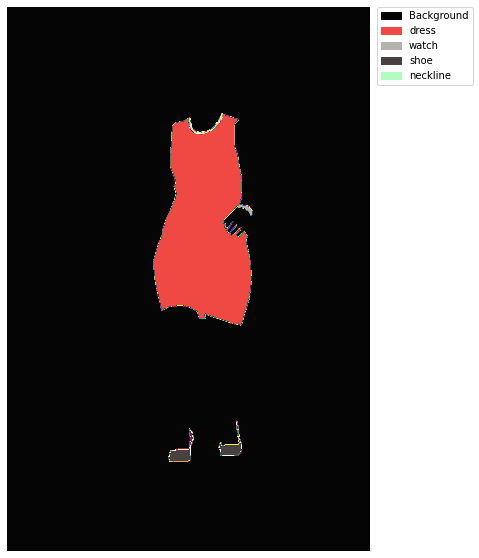

In [18]:
from skimage.io import imread
plot_segmentation(imread('seg_train/b6378ace94b83287e8a0ca7445c7141b_seg.png'))

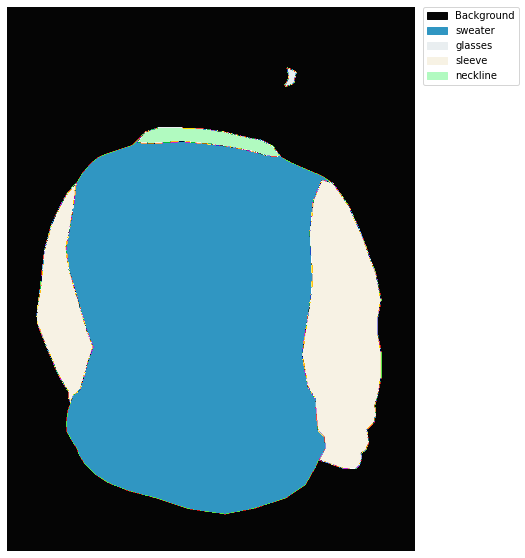

In [19]:
plot_segmentation(imread('seg_train/224df090677cb648415d8a8279db6939_seg.png'))

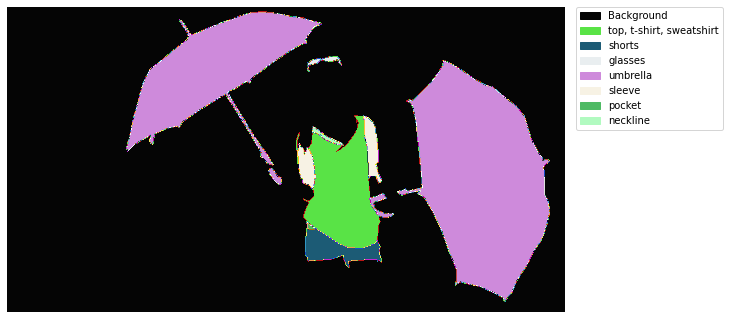

In [50]:
plot_segmentation(imread('seg_train/9d501c23010ed5ae3878662852d44e3e_seg.png'))